In [1]:
import pandas as pd
import numpy as np
import os, time, random

#### Identify Directories

In [2]:
currDir = os.getcwd()
rootDir = os.path.abspath(os.path.join(currDir,'..'))

dataDir = os.path.abspath(os.path.join(rootDir,'data'))
rawDataDir = os.path.abspath(os.path.join(dataDir,'raw'))
interimDataDir = os.path.abspath(os.path.join(dataDir,'interim'))
finalDataDir = os.path.abspath(os.path.join(dataDir,'final'))

#### Reverse Geocoding

In [36]:
import reverse_geocoder as geo

'''
Australia bounding box: ('Australia', (113.338953078, -43.6345972634, 153.569469029, -10.6681857235))
found here: https://gist.github.com/graydon/11198540

'US': ('United States', (-171.791110603, 18.91619, -66.96466, 71.3577635769))
'''  

In [95]:
'''
states = ['Western Australia','South Australia','New South Wales',
          'Tasmania','Northern Territory','Queensland','Victoria']
'''
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
    


In [113]:
t0 = time.time()

N = 1000
result_list = []

for num in range(N):
    
    lat = random.randint(24,50) + random.randint(0,100)/100
    long = random.randint(-124,-67) + random.randint(0,100)/100
    
    '''
    # generate random lats + longs (must be inside Australia bounding box)
    lat = random.randint(-43,-10) + random.randint(0,100)/100
    long = random.randint(113,153) + random.randint(0,100)/100
    '''
    coords = lat, long
    result = geo.search(coords)[0]
    
    row = (lat,long,result['lat'],result['lon'],result['name'],result['admin1'],result['admin2'],result['cc'])
    result_list.append(row)
    #print(result)

    if (num+1) % 100 == 0:
        print(num+1)
    
t1 = time.time()
 
cols = ['gps_lat','gps_long','lat','long','city','state','area','country']
df = pd.DataFrame(result_list,columns=cols)

df['state_flag'] = [row if row in states else 'None' for row in df['state'].values ]


df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)


100
200
300
400
500
600
700
800
900
1000


In [114]:
# no. of minutes
((t1 - t0)/60)

22.952449464797972

In [115]:

CSVs = [file for file in os.listdir(rawDataDir) if ('.csv' and 'geocode' and 'US') in file]
CSVs.sort()

prev_filename = f"{rawDataDir}/reverse_US_geocode_results_pull{len(CSVs)}.csv"
try:
    prev_df = pd.read_csv(prev_filename)
    df = pd.concat([prev_df,df]).reset_index(drop=True)
except: pass

df.drop_duplicates(inplace=True)

filename = f"{rawDataDir}/reverse_US_geocode_results_pull{len(CSVs)+1}.csv"
df.to_csv(filename,index=False)

print(df.shape)


(2200, 9)


In [111]:
df.head()

,gps_lat,gps_long,lat,long,city,state,area,country,state_flag
0,31.78,-94.33,31.90378,-94.39520,Timpson,Texas,Shelby County,US,Texas
1,38.77,-88.01,38.73088,-88.08532,Olney,Illinois,Richland County,US,Illinois
2,28.85,-81.03,28.73972,-81.11506,Geneva,Florida,Seminole County,US,Florida
3,25.86,-96.76,26.10369,-97.16469,South Padre Island,Texas,Cameron County,US,Texas
4,37.23,-97.89,37.28669,-98.02589,Harper,Kansas,Harper County,US,Kansas


In [112]:
df['state_flag'].value_counts()[:15]

None              378
Texas              74
California         73
Florida            40
North Carolina     32
Montana            32
New Mexico         27
Nevada             27
Colorado           24
Wyoming            24
Michigan           24
Massachusetts      23
Idaho              22
Louisiana          22
Utah               19
Name: state_flag, dtype: int64

#### Plotting Data

In [90]:
import matplotlib.pyplot as plt

In [91]:

bounding_box = [(df['gps_long'].min(),df['gps_long'].max()),      
                (df['gps_lat'].min(), df['gps_lat'].max())]


In [92]:
'''
bounding_box = [(df['long'].min(),df['long'].max()),      
                (df['lat'].min(), df['lat'].max())]
'''

"\nbounding_box = [(df['long'].min(),df['long'].max()),      \n                (df['lat'].min(), df['lat'].max())]\n"

KeyError: 'US'

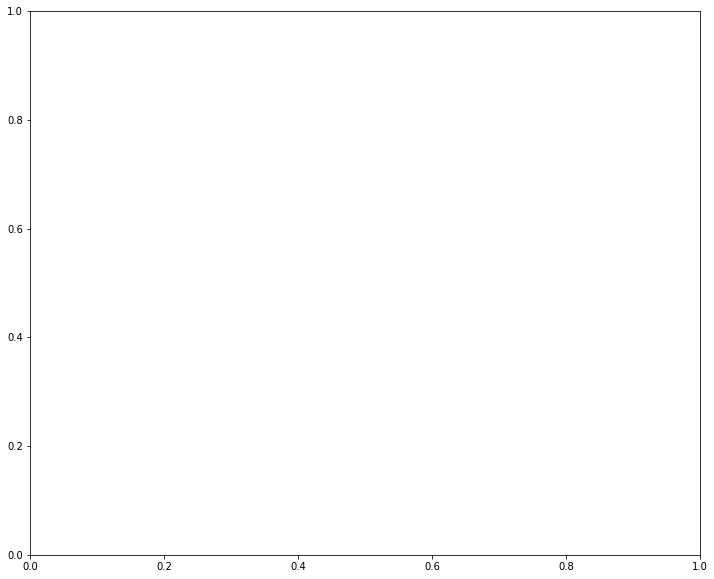

In [93]:
fig, ax = plt.subplots(figsize = (12,10))

color_dict = {'Western Australia':'orange',
              'South Australia':'yellow',
              'New South Wales':'green',
              'Tasmania':'cyan',
              'Northern Territory':'red',
              'Queensland':'maroon',
              'Victoria':'grey',
              'None':'blue'
             }

plt.scatter(df['gps_long'],df['gps_lat']
            ,alpha=0.5
            ,c=df['state_flag'].apply(lambda x: color_dict[x]));

In [ ]:

bounding_box = [(df['long'].min(),df['long'].max()),      
                (df['lat'].min(), df['lat'].max())]


In [ ]:
fig, ax = plt.subplots(figsize = (12,10))

color_dict = {'Western Australia':'orange',
              'South Australia':'yellow',
              'New South Wales':'green',
              'Tasmania':'cyan',
              'Northern Territory':'red',
              'Queensland':'maroon',
              'Victoria':'grey',
              'None':'blue'
             }

plt.scatter(df['long'],df['lat']
            ,alpha=0.5
            ,c=df['state_flag'].apply(lambda x: color_dict[x]));

In [ ]:
df.head()

In [64]:
# df[df['country']!='AU']